In [1]:
import os
import cv2
import glob
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
train_bart = "/training_set/bart"
train_homer = "/training_set/homer"
test_bart = "/test_set/bart"
test_homer = "/test_set/homer"

In [3]:
train_bart_img = glob.glob(os.path.join(train_bart, "*.bmp"))
train_homer_img = glob.glob(os.path.join(train_homer, "*.bmp"))
test_bart_img = glob.glob(os.path.join(test_bart, "*.bmp"))
test_homer_img = glob.glob(os.path.join(test_homer, "*.bmp"))

In [4]:
print(len(train_bart_img))
print(len(train_homer_img))
print(len(test_bart_img))
print(len(test_homer_img))

132
83
28
26


In [5]:
img_generator = ImageDataGenerator(rotation_range=50,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1/255,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

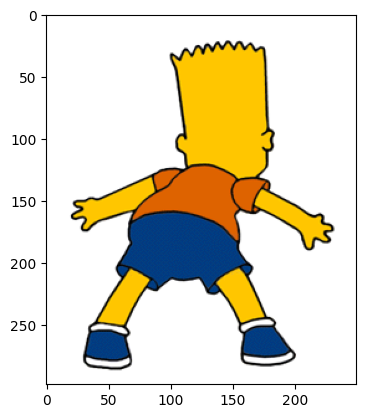

In [6]:
bart = cv2.imread("/training_set/bart/bart105.bmp")
bart = cv2.cvtColor(bart, cv2.COLOR_BGR2RGB)
plt.imshow(bart)

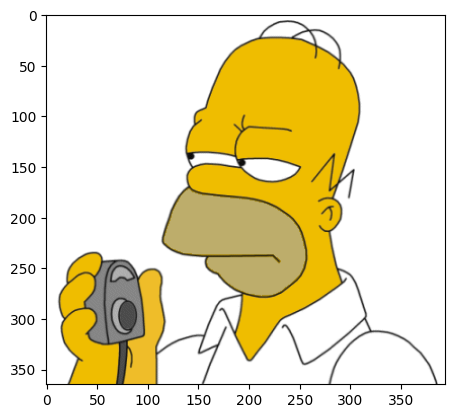

In [7]:
homer = cv2.imread("/training_set/homer/homer104.bmp")
homer = cv2.cvtColor(homer, cv2.COLOR_BGR2RGB)
plt.imshow(homer)

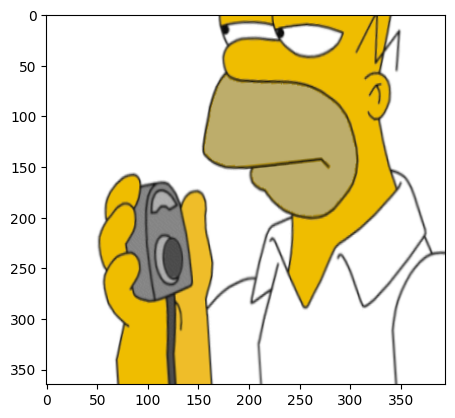

In [8]:
plt.imshow(img_generator.random_transform(homer))

In [9]:
image_shape = (150,150,3)

In [10]:
image_shape[:2]

(150, 150)

In [11]:
train_set = img_generator.flow_from_directory('/training_set',
                                              target_size=image_shape[:2],
                                              batch_size=8,
                                              class_mode="binary")

Found 215 images belonging to 2 classes.


In [12]:
train_set.class_indices

{'bart': 0, 'homer': 1}

In [13]:
test_set = img_generator.flow_from_directory('/test_set',
                                             target_size=image_shape[:2],
                                             batch_size=16,
                                             class_mode="binary")

Found 54 images belonging to 2 classes.


In [14]:
test_labels = test_set.class_indices

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3),  activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=200, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [23]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_set, epochs=10, validation_data=test_set)

Epoch 1/10
27/27 [==============================] - 23s 692ms/step - loss: 0.3848 - accuracy: 0.8279 - val_loss: 0.5059 - val_accuracy: 0.8333
Epoch 2/10
27/27 [==============================] - 14s 520ms/step - loss: 0.3842 - accuracy: 0.8651 - val_loss: 0.4318 - val_accuracy: 0.9074
Epoch 3/10
27/27 [==============================] - 16s 608ms/step - loss: 0.3602 - accuracy: 0.8326 - val_loss: 0.3578 - val_accuracy: 0.8889
Epoch 4/10
27/27 [==============================] - 14s 522ms/step - loss: 0.4580 - accuracy: 0.8419 - val_loss: 0.3993 - val_accuracy: 0.9074
Epoch 5/10
27/27 [==============================] - 14s 497ms/step - loss: 0.3030 - accuracy: 0.8930 - val_loss: 0.5772 - val_accuracy: 0.7778
Epoch 6/10
27/27 [==============================] - 13s 497ms/step - loss: 0.3273 - accuracy: 0.8837 - val_loss: 0.5563 - val_accuracy: 0.8889
Epoch 7/10
27/27 [==============================] - 15s 508ms/step - loss: 0.2920 - accuracy: 0.8837 - val_loss: 0.3301 - val_accuracy: 0.8704

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
# Evaluating the model
y_pred = model.predict(test_set)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

In [25]:
# Classification Report
class_names = ['Bart', 'Homer']
print(classification_report(test_set.classes, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        Bart       0.61      0.61      0.61        28
       Homer       0.58      0.58      0.58        26

    accuracy                           0.59        54
   macro avg       0.59      0.59      0.59        54
weighted avg       0.59      0.59      0.59        54



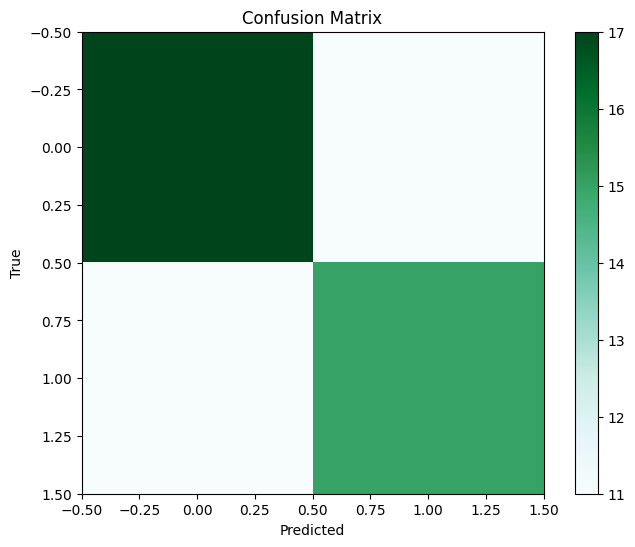

In [26]:
# Confusion Matrix
conf_mat = confusion_matrix(test_set.classes, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.BuGn)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()